In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from scipy.stats import skew
import warnings
sns.set()

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
abalone_data = pd.read_csv('abalone.csv' )
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
abalone_data.shape

(4177, 9)

In [7]:
abalone_data.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [8]:
nf = abalone_data.select_dtypes(include=[np.number]).columns
cf = abalone_data.select_dtypes(include=[np.object]).columns
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

The analysis shows that the Ring attribute values ranges from 1 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate the distribution of this attribute to a normal curve.

In [9]:
cf

Index(['Sex'], dtype='object')

In [10]:
skew_list = skew(abalone_data[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_abalone_data = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [11]:
skew_list_abalone_data.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [12]:
mv_abalone_data = abalone_data.isnull().sum().sort_values(ascending = False)
pmv_abalone_data = (mv_abalone_data/len(abalone_data)) * 100
missing_abalone_data = pd.concat([mv_abalone_data,pmv_abalone_data], axis = 1, keys = ['Missing Values','% Missing'])

In [13]:
missing_abalone_data

,Missing Values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [14]:
print(abalone_data.Rings.value_counts(normalize = True))

9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64


In [15]:
skew_list_abalone_data.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [16]:
print(abalone_data.Sex.value_counts(normalize = True))

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64


Univariate analysis
It means analysis of individual attributes with different visualization method. Lets see how target variable Rings look.

Target attribute

In [17]:
abalone_data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

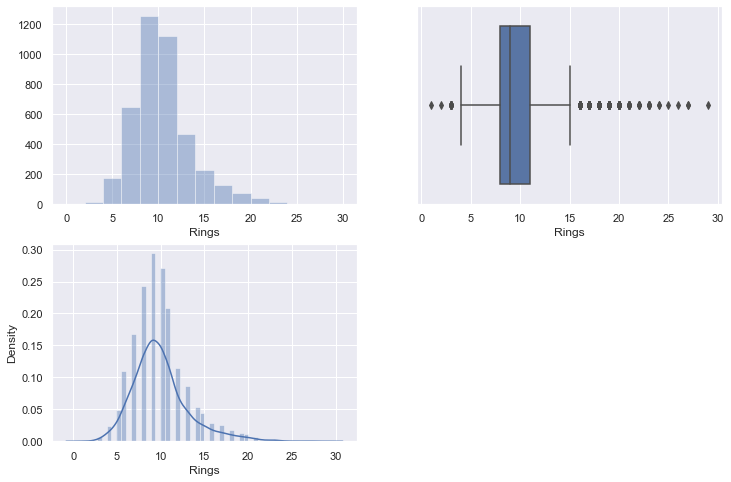

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

WE can see there is outlier in Rings column, we will remove and see how it show later on.



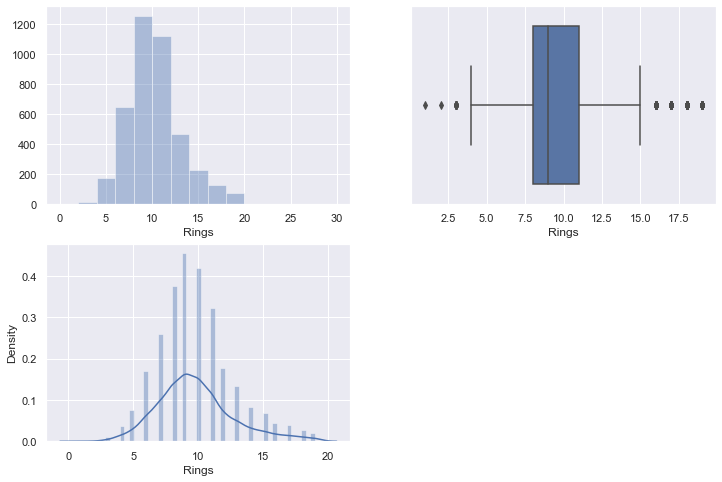

In [19]:
abalone_data = abalone_data[abalone_data['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

Size attributes
Size attributes includes dimension of abalone which comprises about abalone height, diameter and length. We will observe these attributes by showing them with histogram and boxplot.

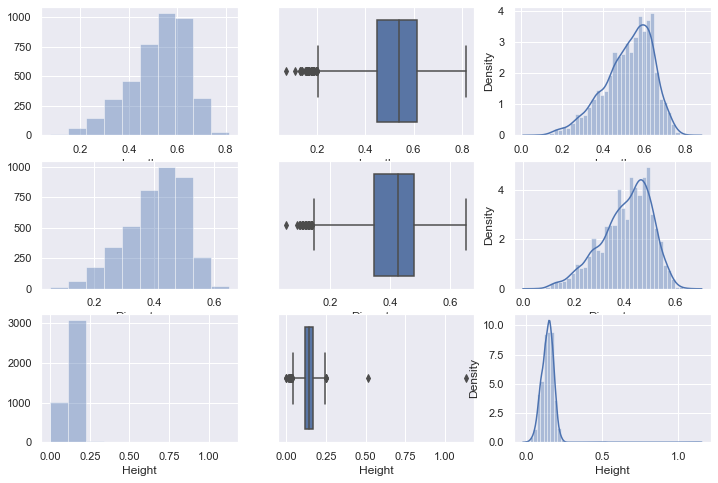

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.Thats outlier.

Thus, we filter these outliers in order to obtain a more realistic visualization of the distribution of the Height attribute:



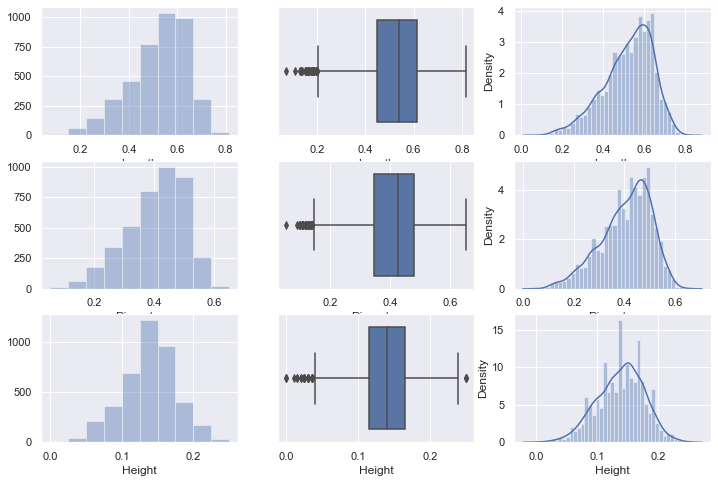

In [21]:
abalone_data = abalone_data[abalone_data['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

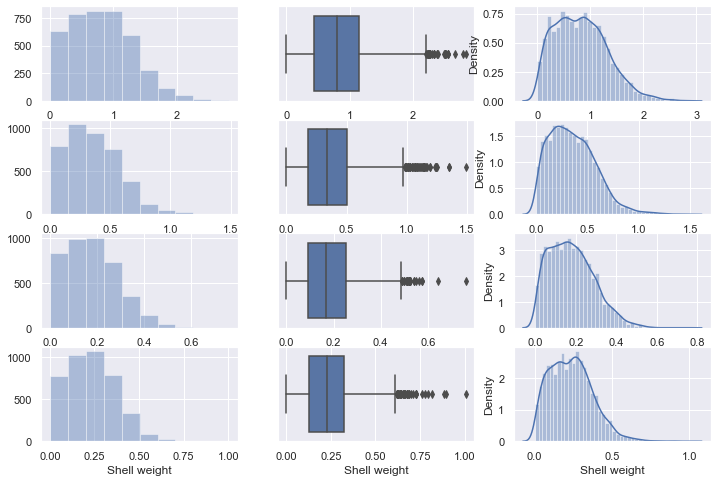

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.distplot(abalone_data['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(abalone_data['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(abalone_data['Whole weight']);

plt.subplot(4,3,4)
sns.distplot(abalone_data['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(abalone_data['Shucked weight']);
plt.subplot(4,3,6)
sns.distplot(abalone_data['Shucked weight']);

plt.subplot(4,3,7)
sns.distplot(abalone_data['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(abalone_data['Viscera weight']);
plt.subplot(4,3,9)
sns.distplot(abalone_data['Viscera weight']);

plt.subplot(4,3,10)
sns.distplot(abalone_data['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(abalone_data['Shell weight']);
plt.subplot(4,3,12)
sns.distplot(abalone_data['Shell weight']);

# Weight attributes


The weight attributes includes rest of the wiights attributes and were analyzed following a similar approach to the Size attributes analysis. A similar distributions were observed, however, for the weight attributes the bell curve is a little larger.



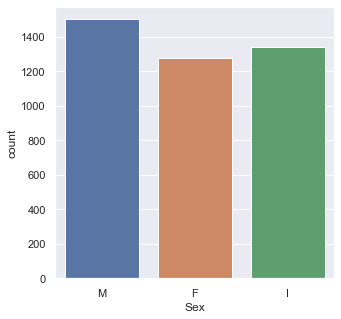

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(abalone_data.Sex);

# SEX attribute- categorical variable


The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

# multivariate analysis

In this section we analyzed how the dataset attributes are related and how the independent variables influences the target variable. Our first step in the multivariate analysis was to visualize the correlation matrix in a heatma

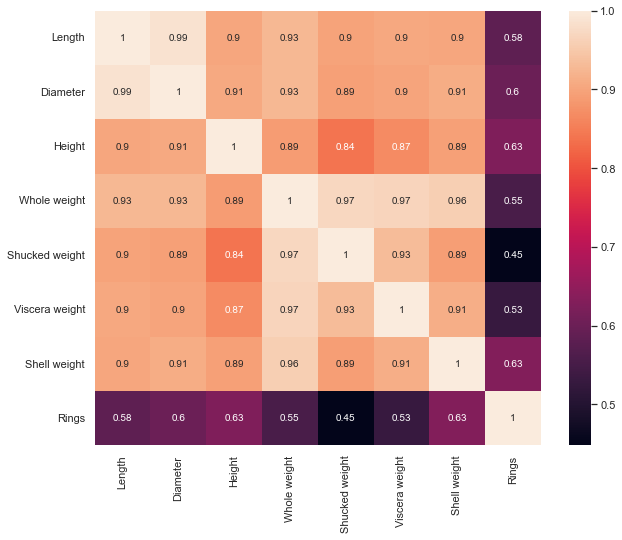

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(abalone_data.corr(), annot = True);

Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates(0.62) to Rings. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings:



<Figure size 720x360 with 0 Axes>

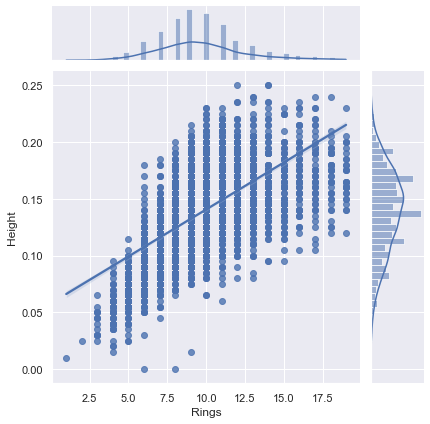

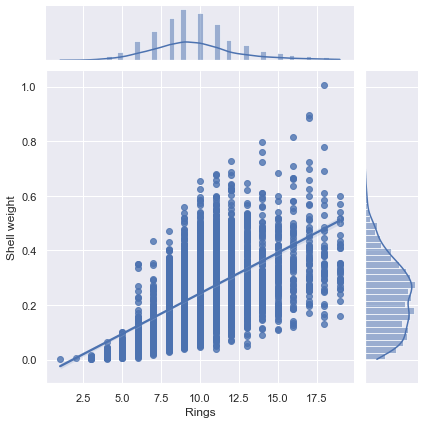

In [25]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=abalone_data, x='Rings', y='Height', kind='reg');
sns.jointplot(data=abalone_data, x='Rings', y='Shell weight', kind='reg');

# How correlation varies with the number of rings ?


Based on the previous analysis, we decided to investigate the variation of the correlation regarding the number of rings in more detail. We tested for many values, and found that the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.

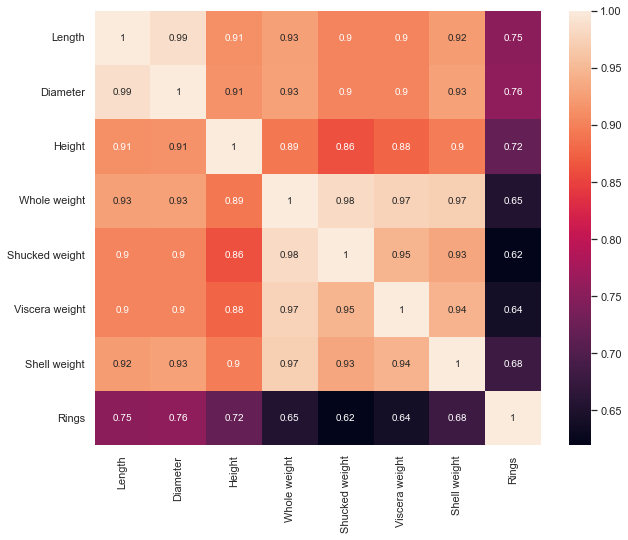

In [26]:
i_abalone = abalone_data[abalone_data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = i_abalone.corr()
sns.heatmap(corr, annot=True);

# correlation between size attributes and Rings.


<Figure size 1440x360 with 0 Axes>

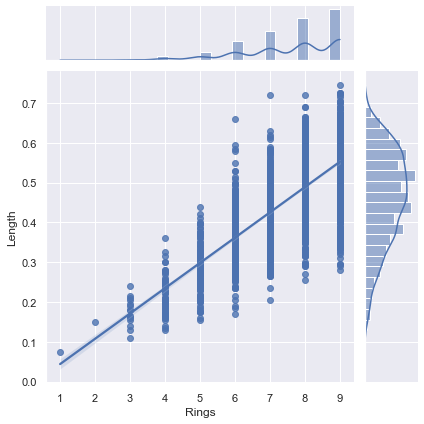

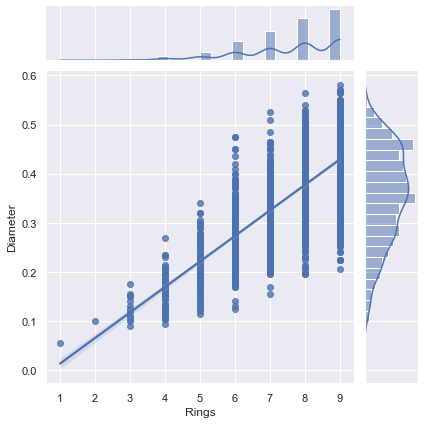

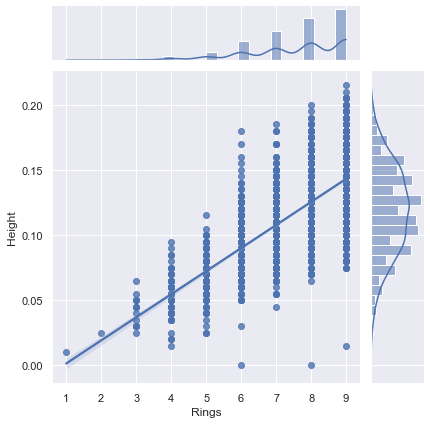

In [27]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=i_abalone, x='Rings', y='Length', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')

The violin plots bellow show that the median of Size attributes increases as instances are grouped by Rings

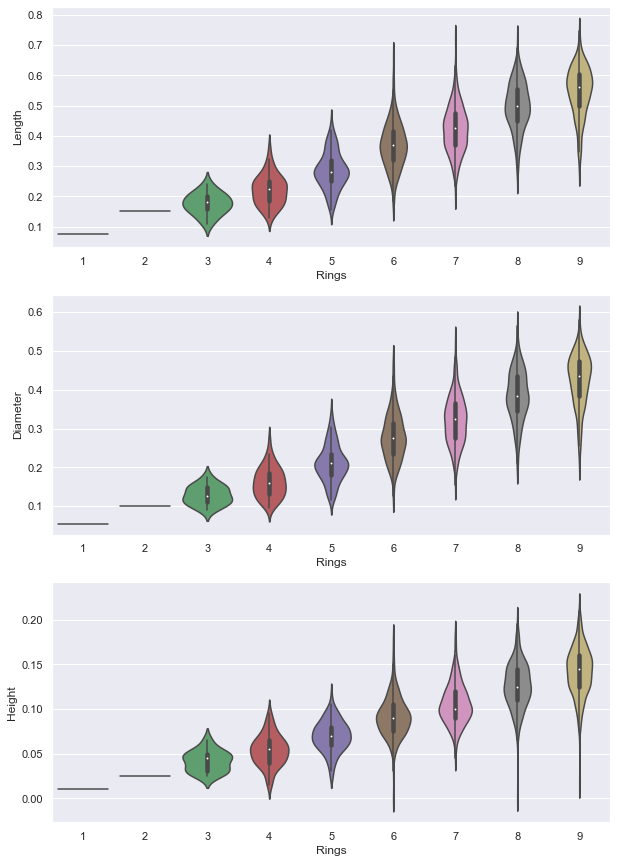

In [28]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.violinplot(data=i_abalone, x='Rings', y='Length')
plt.subplot(3,1,2)
sns.violinplot(data=i_abalone, x='Rings', y='Diameter')
plt.subplot(3,1,3)
sns.violinplot(data=i_abalone, x='Rings', y='Height');

We observe a similar result where comparing Height and Shell weight to Rings

<Figure size 1440x360 with 0 Axes>

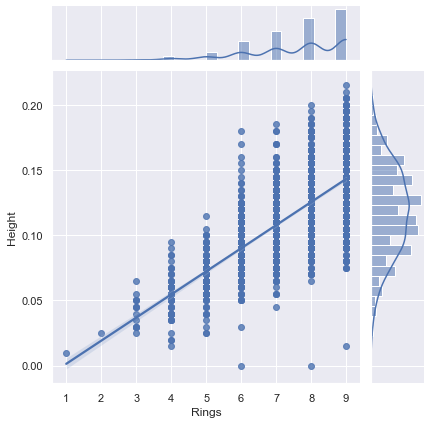

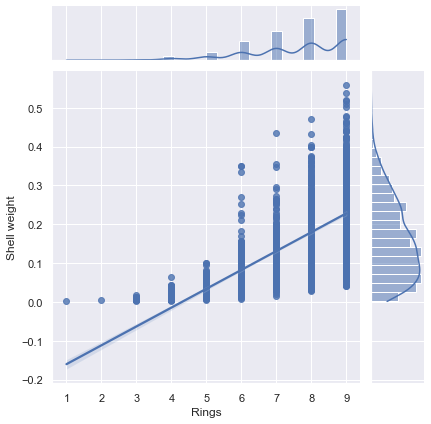

In [29]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg');
sns.jointplot(data=i_abalone, x='Rings', y='Shell weight', kind='reg');

# How correlation shows when Rings more than 10

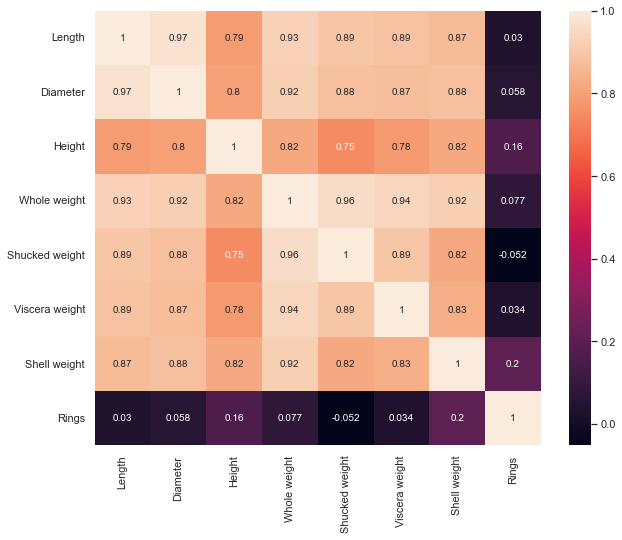

In [30]:
a_abalone = abalone_data[abalone_data['Rings'] >= 10]

plt.figure(figsize=(10, 8))
corr = a_abalone.corr()
sns.heatmap(corr, annot=True);

These results suggest that abalones grows in size and weight until a certain age, near 10 years. After this age their size and age remains stable in function of age, depending more on environmental factors.



# Influence of Sex on attributes


Finally, we analyze how the Sex category influences the distribution of variables Rings, Height and Shell weight. Our objective is learn if the different categories of abalones have different distribution parameters or even form. To accomplish this objective, we visualize the distribution of each one of these parameters in relation to Sex. Finally, we analyze how the different Sex categories of abalones influence the correlation of Rings, Height and Shell weight.



<Figure size 1440x720 with 0 Axes>

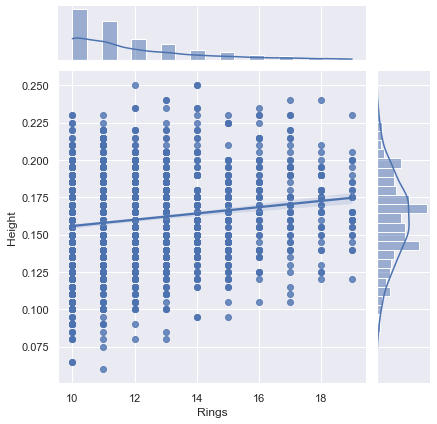

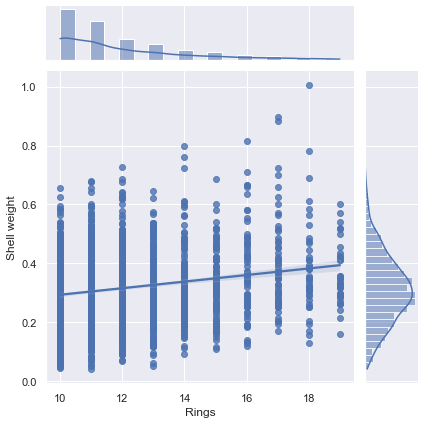

In [31]:
plt.figure(figsize=(20, 10))

sns.jointplot(data=a_abalone, y='Height', x='Rings', kind='reg');
sns.jointplot(data=a_abalone, y='Shell weight', x='Rings', kind='reg');

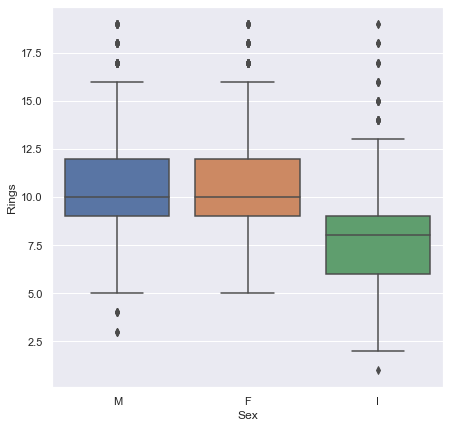

In [32]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Rings');

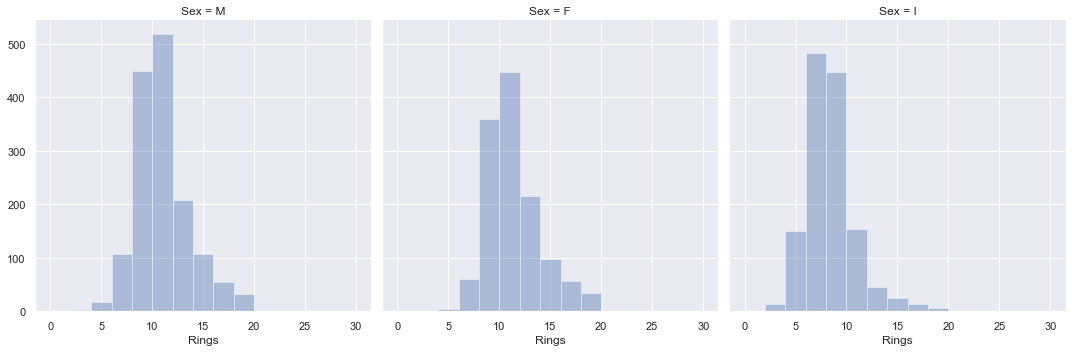

In [33]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2));

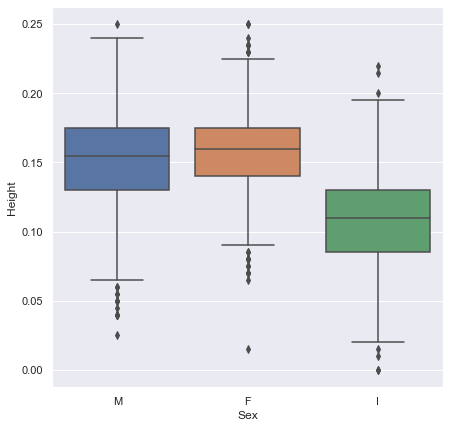

In [34]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Height');

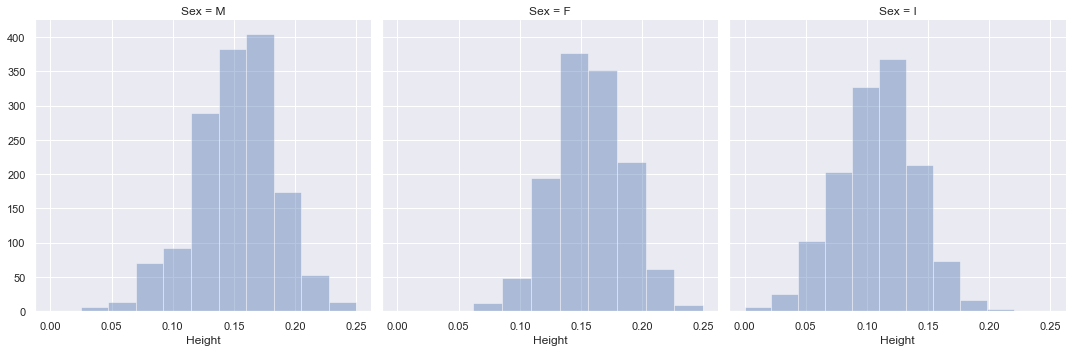

In [35]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Height', kde=False, bins= 10);

# For shell weight


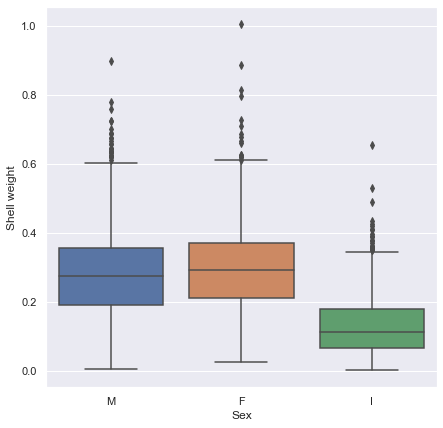

In [36]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Shell weight');

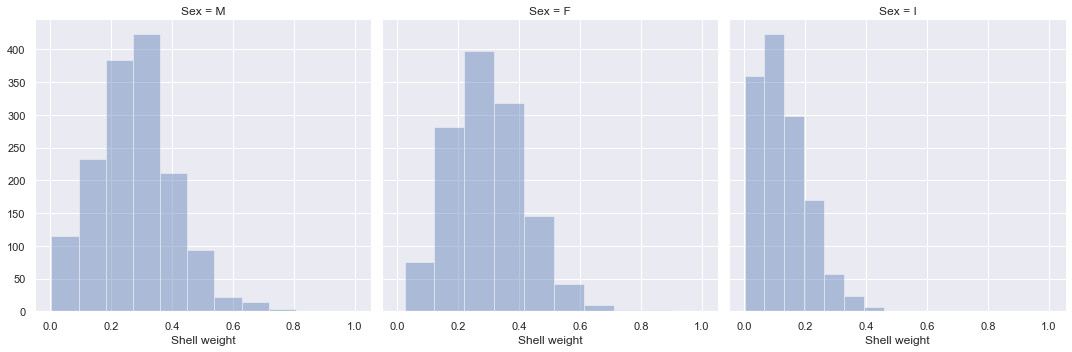

In [37]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Shell weight', kde=False, bins= 10);


Finally, we analyze how the sex categories influence the correlations Rings & Height and Rings & Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger correlation to rings. Observing the regression curve for the Infant category, we notice that its inclination is closer to 45°.

we conclude that it is possible to build a model to predict the target value in function of the independent attributes.

<Figure size 1440x360 with 0 Axes>

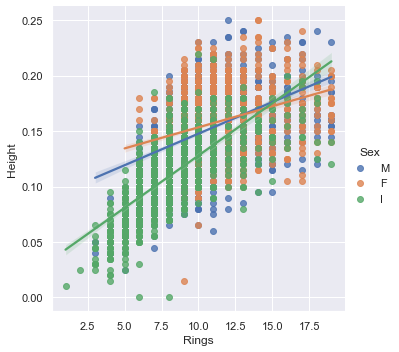

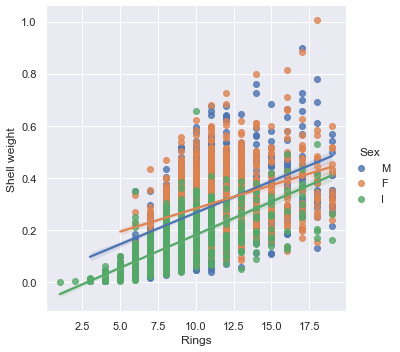

In [38]:
plt.figure(figsize=(20, 5))

sns.lmplot(data=abalone_data, x='Rings', y='Height', hue='Sex', fit_reg=True);
sns.lmplot(data=abalone_data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);

In [39]:
print(abalone_data.Sex.value_counts(normalize = True))

M    0.364697
I    0.325553
F    0.309750
Name: Sex, dtype: float64


In [40]:
abalone_data['Age'] = abalone_data['Rings'] + 1.5
abalone_data['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [41]:
abalone_data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.578407,0.454125,0.156735,1.040483,0.446032,0.230111,0.298489,12.364992
M,0.560343,0.438250,0.150667,0.985388,0.432071,0.214717,0.278955,12.013333
I,0.427479,0.326270,0.107864,0.430183,0.190659,0.091800,0.127883,9.362584


# Convert categorical data to numerical data

In [42]:
abalone_data['Sex'] = LabelEncoder().fit_transform(abalone_data['Sex'].tolist())


In [43]:
#transformed_sex_feature = OneHotEncoder().fit_transform(abalone_data['Sex'].values.reshape(-1,1)).toarray()
#df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i))for i in range(transformed_sex_feature.shape[1])])
#abalone_data = pd.concat([abalone_data, df_sex_encoded], axis=1)


In [44]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [45]:
Xtrain = abalone_data.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = abalone_data['Rings']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
logreg = LogisticRegression()

logreg.fit(X_train,Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred)

In [49]:
result_acc

0.2503681885125184

In [50]:
abalone_data['newRings'] = np.where(abalone_data['Rings'] > 10,1,0)

In [51]:
Xtrain = abalone_data.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = abalone_data['newRings']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [53]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [54]:
result_acc

0.7540500736377025

In [55]:
from sklearn import svm

In [56]:
Xtrain = abalone_data.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = abalone_data['Rings']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [58]:
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [59]:
result_acc

0.36229749631811486

In [60]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [61]:
result_acc

0.35640648011782033

In [62]:
new_abalone_data = abalone_data.copy()

In [63]:
new_abalone_data['newRings_1'] = np.where(abalone_data['Rings'] <= 8,1,0)
new_abalone_data['newRings_2'] = np.where(((abalone_data['Rings'] > 8) & (abalone_data['Rings'] <= 10)), 2,0)
new_abalone_data['newRings_3'] = np.where(abalone_data['Rings'] > 10,3,0)

In [64]:
new_abalone_data['newRings'] = new_abalone_data['newRings_1'] + new_abalone_data['newRings_2'] + new_abalone_data['newRings_3']

In [65]:
Xtrain = new_abalone_data.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_abalone_data['newRings']

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [67]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 


In [68]:
result_acc

0.9941089837997055